## Understanding the Datasets

In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/0c/qb2w9b4121zg300g7nkwk3w80000gn/T/ipykernel_49600/4056153941.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## Load the Data

In [3]:
df_full = pd.read_csv("train.csv")
print('train_df Shape:', df_full.shape)
df_full.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


## Explore, Clean, Validate, and Visualize the Data 

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

There are many entries, so let's work on 50% of the dataset

In [5]:
df = df_full.iloc[:len(df_full) // 2]

([<matplotlib.patches.Wedge at 0x28889d5e0>,
 [Text(-0.9257520856117151, 0.5941237884360127, 'non-churn'),
  Text(0.9257520299858272, -0.5941238751111761, 'churn')],
 [Text(-0.5049556830609354, 0.3240675209650978, '81.8%'),
  Text(0.504955652719542, -0.3240675682424597, '18.2%')])

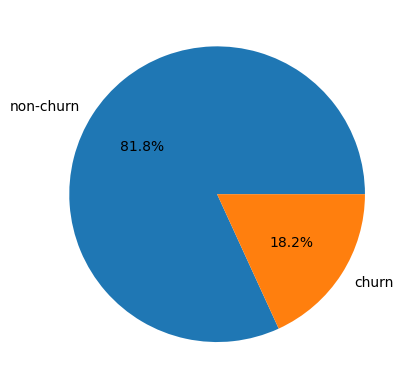

In [6]:
churn_counts = df['Churn'].value_counts()

plt.figure()
plt.pie(churn_counts, labels=['non-churn', 'churn'], autopct='%1.1f%%')

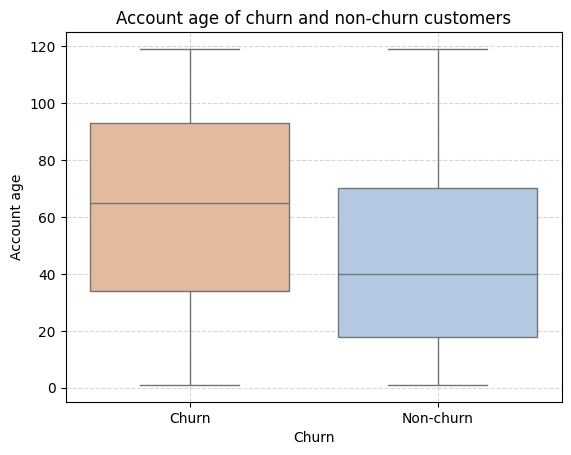

In [7]:
plt.figure()
sns.boxplot(x='Churn', y='AccountAge', data=df, hue='Churn', legend=False, palette=['#f0b793', '#abc9ea'])
plt.title('Account age of churn and non-churn customers')
plt.xlabel('Churn')
plt.ylabel('Account age')
plt.xticks([0, 1], ['Churn', 'Non-churn'])
plt.grid(True, linestyle='--', alpha=0.5)

/var/folders/0c/qb2w9b4121zg300g7nkwk3w80000gn/T/ipykernel_49600/3230175412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=variable, data=df, palette=['#f0b793', '#abc9ea'], ax=axes[i])
/var/folders/0c/qb2w9b4121zg300g7nkwk3w80000gn/T/ipykernel_49600/3230175412.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Churn', 'Non-churn'])
/var/folders/0c/qb2w9b4121zg300g7nkwk3w80000gn/T/ipykernel_49600/3230175412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=variable, data=df, palette=['#f0b793', '#abc9ea'], ax=axes[i])
/var/folders/0c/qb2w9b4121zg3

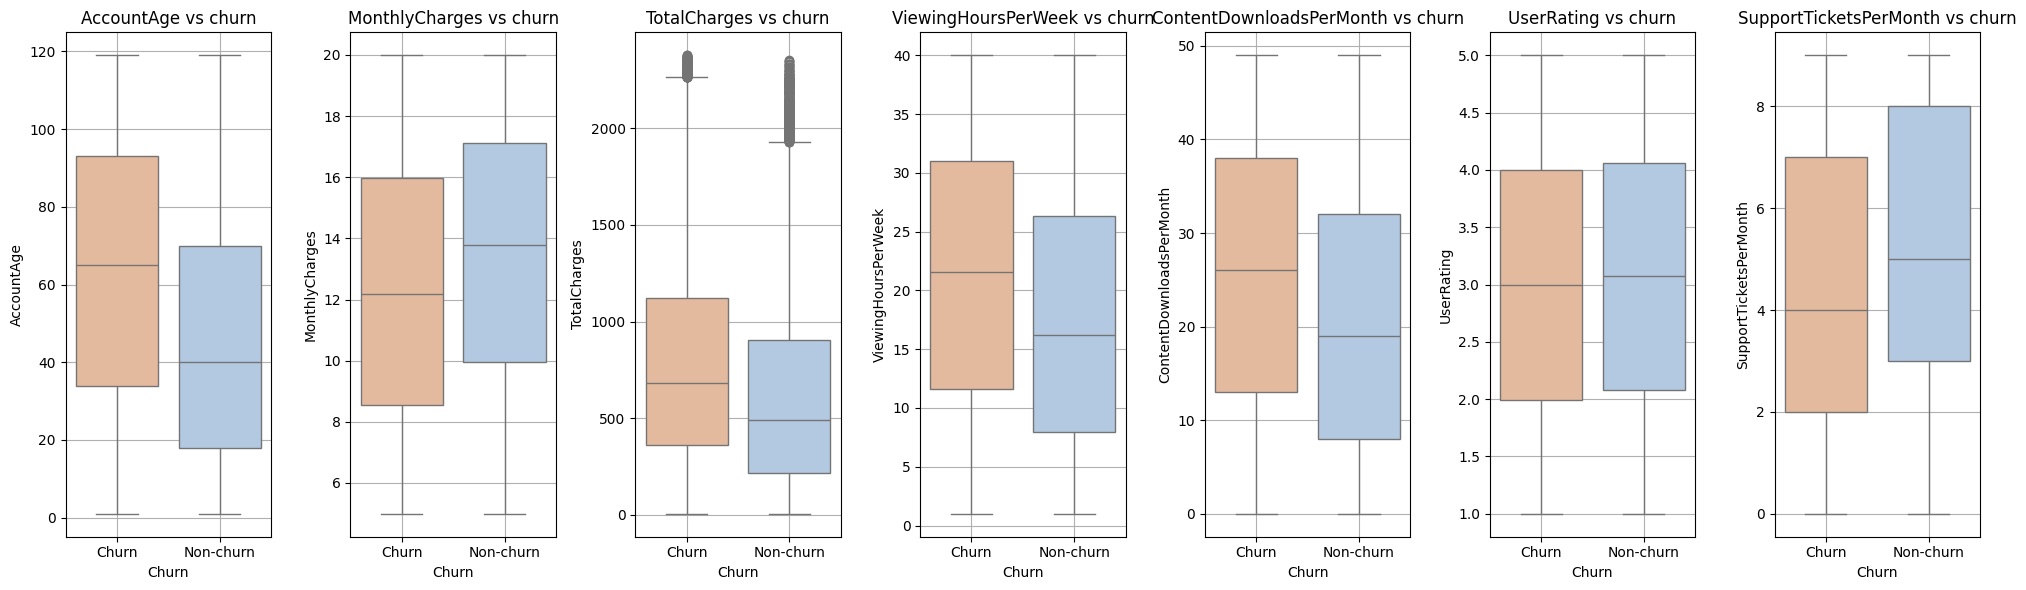

In [8]:
# numerical variables
variables_to_compare = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth']

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(20, 6))

for i, variable in enumerate(variables_to_compare):
    sns.boxplot(x='Churn', y=variable, data=df, palette=['#f0b793', '#abc9ea'], ax=axes[i])
    axes[i].set_title(f'{variable} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(variable)
    axes[i].set_xticklabels(['Churn', 'Non-churn'])
    axes[i].grid(True)

plt.tight_layout()
plt.show()


The comparison of numerical values vs churn shows that:
* the older the account, the more likely it is to churn 
* users churn despite lower monthly charges
* total charges correspond to account age 
* users churn despite using platform more than non-churn users
* users who churn are less satisfied, but they don't report the problems 

The above analysis may indicate that customers **should be encouraged to report the problems they encounter**.

Taking into account the fact that users churn despite lower monthly charges than those who don't churn, we can assume that **price isn't a problem**. 

In [9]:
df['SubscriptionType'].unique()

array(['Premium', 'Basic', 'Standard'], dtype=object)

<Axes: xlabel='SubscriptionType'>

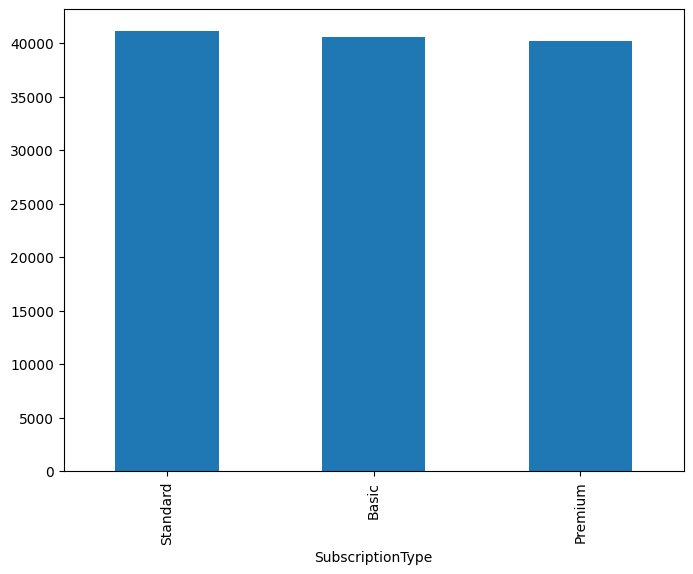

In [10]:
sub_count = df['SubscriptionType'].value_counts()

plt.figure(figsize=(8,6))
sub_count.plot(kind='bar')


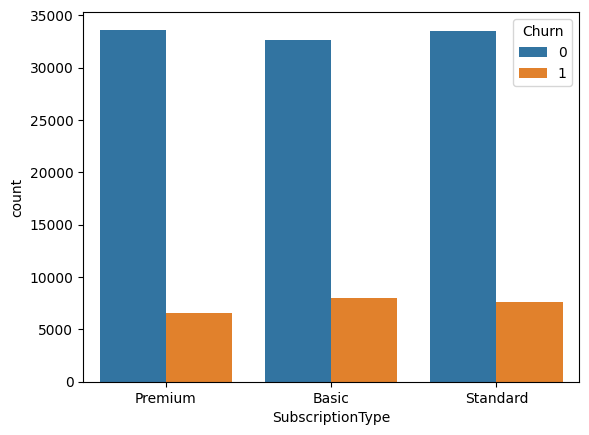

In [11]:
sns.countplot(x='SubscriptionType', hue='Churn', data=df)
plt.show()


In [12]:
churn_sub_type = df[df['Churn'] == 1]['SubscriptionType'].value_counts()
total_sub_type = df['SubscriptionType'].value_counts()
churn_sub_type_df = pd.concat([churn_sub_type, total_sub_type], axis=1)
churn_sub_type_df['churn_percent'] = ((churn_sub_type / total_sub_type) * 100).astype(int)

In [13]:
churn_sub_type_df

,count,count,churn_percent
SubscriptionType,,,
Basic,8014,40612,19
Standard,7580,41115,18
Premium,6544,40166,16


There aren't big differences, but we can see that premium subs are slightly less likely to churn, so it's a good idea to **nudge users to switch to premium**. 

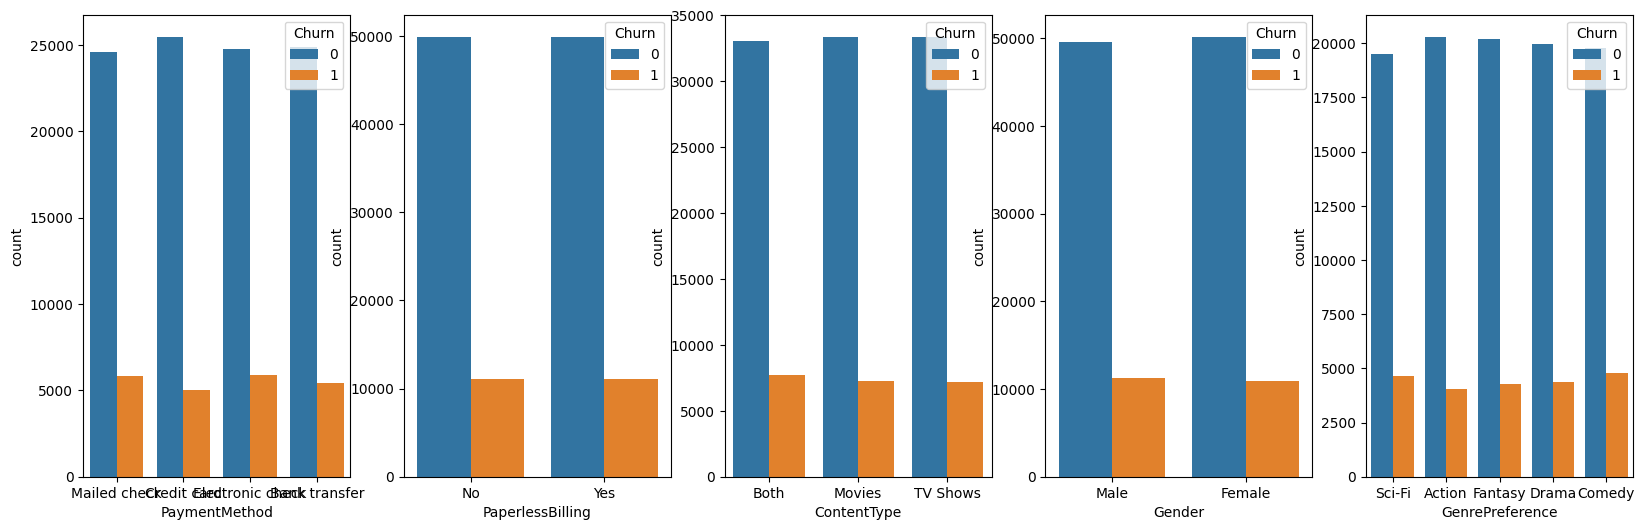

In [14]:
variables_to_compare =  ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'Gender', 'GenrePreference']

fig, axarr = plt.subplots(1, len(variables_to_compare), figsize=(20, 6))

for i, variable in enumerate(variables_to_compare):
    sns.countplot(data=df, x=variable, hue='Churn', ax=axarr[i])

    

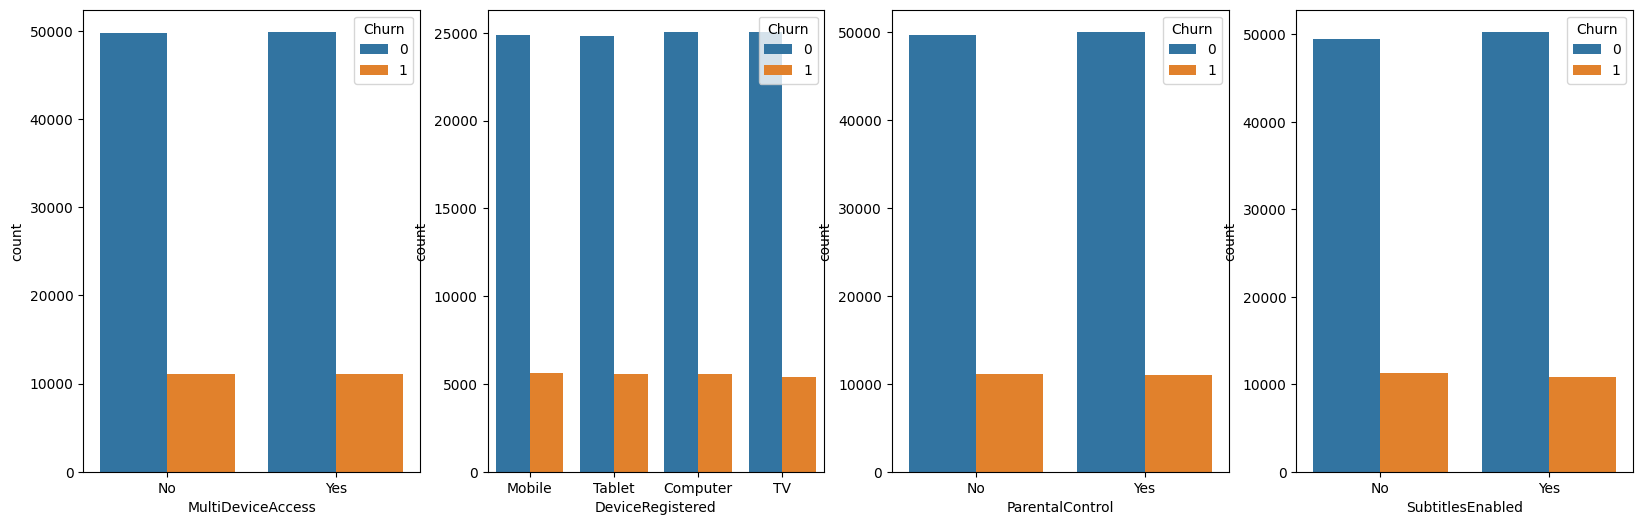

In [15]:
variables_to_compare =  ['MultiDeviceAccess', 'DeviceRegistered', 'ParentalControl', 'SubtitlesEnabled']
fig, axarr = plt.subplots(1, len(variables_to_compare), figsize=(20, 6))

for i, variable in enumerate(variables_to_compare):
    sns.countplot(data=df, x=variable, hue='Churn', ax=axarr[i])

    

There aren't big differences in the above categories. We can notice differences in payment method and genre preferences. Let's focus on those.

In [16]:
def churn_percentage(column):
    churn = df[df['Churn'] == 1][column].value_counts()
    total = df[column].value_counts()
    churn_df = pd.concat([churn, total], axis=1)
    churn_df['churn_percent'] = ((churn / total) * 100).astype(int)

    return churn_df

Text(0, 0.5, 'Percent of churns')

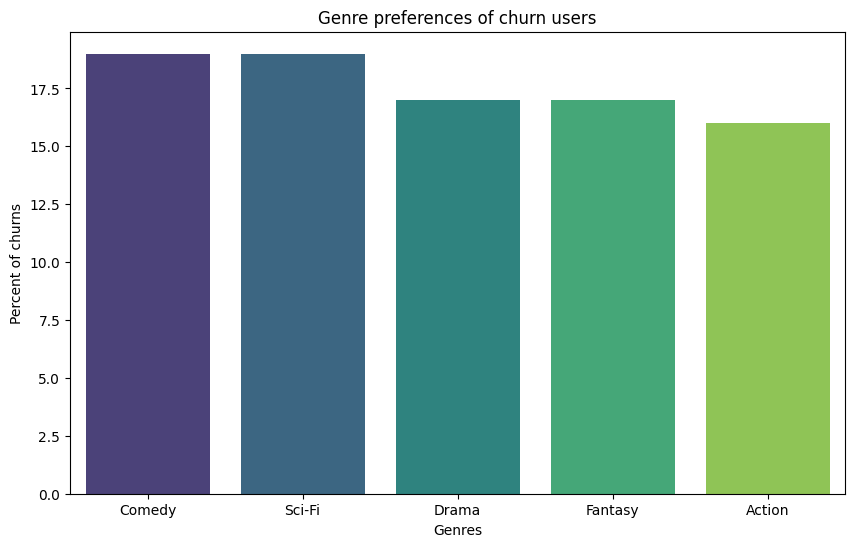

In [17]:
genre_churn_percentage = churn_percentage('GenrePreference')

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_churn_percentage, x=genre_churn_percentage.index, y='churn_percent', hue=genre_churn_percentage.index, legend=False, palette='viridis')

plt.title('Genre preferences of churn users')
plt.xlabel('Genres')
plt.ylabel('Percent of churns')


Text(0, 0.5, 'Percent of churns')

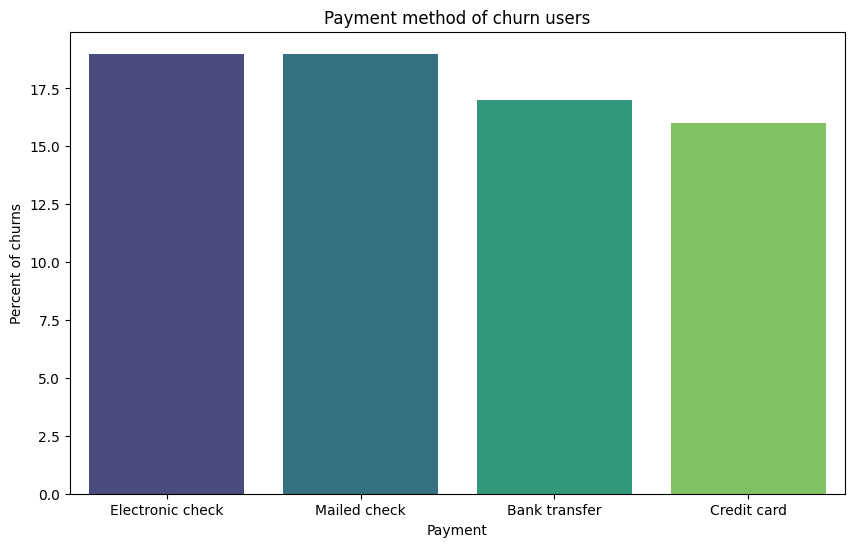

In [18]:
payment_churn_percentage = churn_percentage('PaymentMethod')

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_churn_percentage, x=payment_churn_percentage.index, y='churn_percent', hue=payment_churn_percentage.index, legend=False, palette='viridis')

plt.title('Payment method of churn users')
plt.xlabel('Payment')
plt.ylabel('Percent of churns')


There are slight differences, but maybe the company should focus more on **comedy and sci-fi**. They should also encourage users to opt for **credit card payments**.

# Machine learning

In [19]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [20]:
X_train = df.drop(['CustomerID', 'Churn'], axis=1)
y_train = df['Churn']

In [21]:
df_second_half = df_full.iloc[len(df_full) // 2:]
X_test = df_second_half.drop(['CustomerID', 'Churn'], axis=1)
y_test = df_second_half['Churn']

## Numeric features

In [22]:
numeric_features_train = X_train.select_dtypes(include=['float', 'int'])
numeric_features_test = X_test.select_dtypes(include=['float', 'int'])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num = scaler.fit_transform(numeric_features_train)
X_test_num = scaler.fit_transform(numeric_features_test)

In [24]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_num, y_train)

LogisticRegression()

In [25]:
y_preds_num = logistic_classifier.predict(X_test_num)

In [26]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds_num))

[[97944  1906]
 [19566  2478]]


Text(50.722222222222214, 0.5, 'actual')

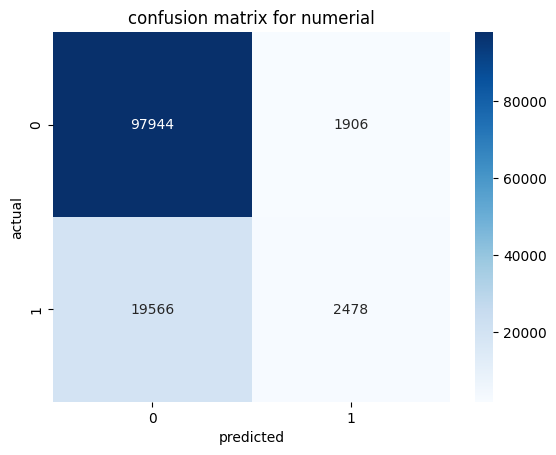

In [27]:
cm = confusion_matrix(y_test, y_preds_num)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.title('confusion matrix for numerial')
plt.xlabel('predicted')
plt.ylabel('actual')

## Categorical and numeric features

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
numeric_columns = X_train.select_dtypes(include=['float', 'int']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns),
        ('scaler', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'
)

In [31]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


## Logistic regression

In [32]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_processed, y_train)

LogisticRegression()

In [33]:
y_preds = logistic_classifier.predict(X_test_processed)

In [34]:
print(confusion_matrix(y_test, y_preds))

[[97814  2036]
 [19367  2677]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_reg = accuracy_score(y_test, y_preds)

precision_reg = precision_score(y_test, y_preds)

recall_reg = recall_score(y_test, y_preds)

f1_reg = f1_score(y_test, y_preds)

print("accuracy:", accuracy_reg)
print("precision:", precision_reg)
print("recall:", recall_reg)
print("F1-score:", f1_reg)

accuracy: 0.824413014586444
precision: 0.5680033948652663
recall: 0.12143894030121576
F1-score: 0.2000971708338005


## Principle component analysis

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1) # takes all x values and turns into 1 data point
X_train_scaled = pca.fit_transform(X_train_processed)

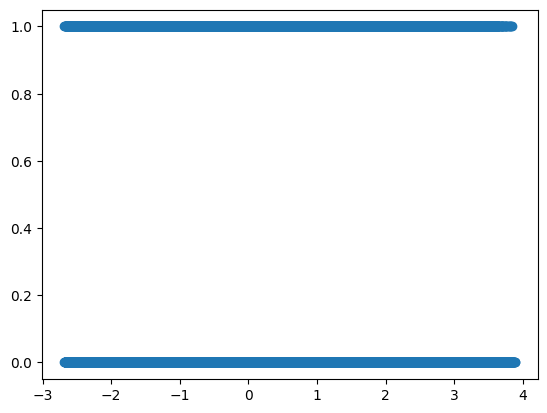

In [37]:
plt.scatter(X_train_scaled, y_train)
plt.show()

Definitely not good

## Gradient boost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train_processed, y_train)

GradientBoostingClassifier()

In [39]:
y_preds = gradientboost.predict(X_test_processed)

In [40]:
print(confusion_matrix(y_test, y_preds))

[[98257  1593]
 [19918  2126]]


Text(50.722222222222214, 0.5, 'actual')

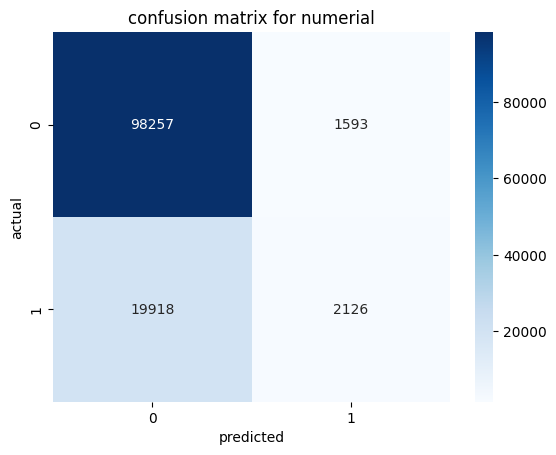

In [41]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.title('confusion matrix for numerial')
plt.xlabel('predicted')
plt.ylabel('actual')

In [42]:
from sklearn.metrics import f1_score

f1_gradient = f1_score(y_test, y_preds).round(2)

print("F1-score:", f1_gradient)

F1-score: 0.17


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_gradient = accuracy_score(y_test, y_preds)

precision_gradient = precision_score(y_test, y_preds)

recall_gradient = recall_score(y_test, y_preds)

f1_gradient = f1_score(y_test, y_preds)

print("accuracy:", accuracy_gradient)
print("precision:", precision_gradient)
print("recall:", recall_gradient)
print("F1-score:", f1_gradient)

accuracy: 0.8235269988678688
precision: 0.571659048131218
recall: 0.09644347668299764
F1-score: 0.1650428909676668


## XGBoost

In [44]:
from xgboost import XGBClassifier

In [45]:
xgboost = XGBClassifier()
xgboost.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_preds = xgboost.predict(X_test_processed)

In [47]:
from sklearn.metrics import f1_score

f1_gradient_boost = f1_score(y_test, y_preds).round(2)

print("F1-score:", f1_gradient_boost)

F1-score: 0.22


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_gradient_boost = accuracy_score(y_test, y_preds)

precision_gradient_boost = precision_score(y_test, y_preds)

recall_gradient_boost = recall_score(y_test, y_preds)

f1_gradient_boost = f1_score(y_test, y_preds)

print("accuracy:", accuracy_gradient_boost)
print("precision:", precision_gradient_boost)
print("recall:", recall_gradient_boost)
print("F1-score:", f1_gradient_boost)

accuracy: 0.81995832444583
precision: 0.508099173553719
recall: 0.1394483759753221
F1-score: 0.21883676229799956


## Decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(criterion='entropy')

In [85]:
y_preds = tree.predict(X_test_processed)

In [86]:
print(confusion_matrix(y_test, y_preds))

[[82844 17006]
 [15658  6386]]


In [87]:
forest = RandomForestClassifier(n_estimators=800)
forest.fit(X_train_processed, y_train)

KeyboardInterrupt: 

In [ ]:
y_preds = forest.predict(X_test_processed)
print(confusion_matrix(y_test, y_preds))

[[98920   930]
 [20660  1384]]


Text(50.722222222222214, 0.5, 'actual')

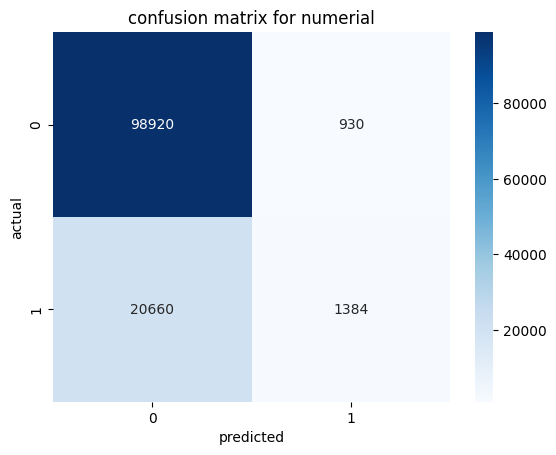

In [55]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.title('confusion matrix for numerial')
plt.xlabel('predicted')
plt.ylabel('actual')

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_forest = accuracy_score(y_test, y_preds)

precision_forest = precision_score(y_test, y_preds)

recall_forest = recall_score(y_test, y_preds)

f1_forest = f1_score(y_test, y_preds)

print("accuracy:", accuracy_forest)
print("precision:", precision_forest)
print("recall:", recall_forest)
print("F1-score:", f1_forest)

accuracy: 0.8228788947774296
precision: 0.5980985306828004
recall: 0.06278352386136818
F1-score: 0.1136382297397159


In [62]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')
svm.fit(X_train_processed, y_train)

SVR(kernel='linear')

## Compare the models

In [78]:
models = ['Gradient', 'Gradient Boost', 'Random Forest']
accuracy = [accuracy_gradient, accuracy_gradient_boost, accuracy_forest]
precision = [precision_gradient, precision_gradient_boost, precision_forest]
recall = [recall_gradient, recall_gradient_boost, recall_forest]
f1_score = [f1_gradient, f1_gradient_boost, f1_forest]

models_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
})

models_df

,Model,Accuracy,Precision,Recall,F1-score
0,Gradient,0.823527,0.571659,0.096443,0.165043
1,Gradient Boost,0.819958,0.508099,0.139448,0.218837
2,Random Forest,0.822879,0.598099,0.062784,0.113638


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [91]:
y_pred = knn.predict(X_test_processed)


In [92]:
print(confusion_matrix(y_test, y_pred))

[[94252  5598]
 [18766  3278]]
